In [4]:
import warnings
warnings.filterwarnings("ignore")

# modules and things

In [5]:

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers.experimental import preprocessing
%matplotlib inline


In [3]:
train = pd.read_csv('.\\train.csv')
# an empty test set
test = pd.read_csv('.\\test.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [7]:
train.shape,test.shape

((42000, 785), (28000, 784))

<AxesSubplot:xlabel='label', ylabel='count'>

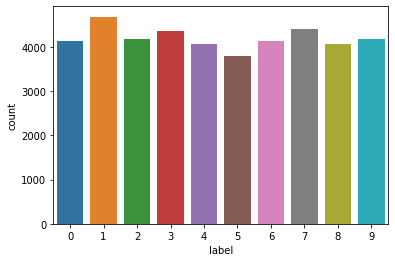

In [8]:
sns.countplot(x=train.label, data=train)

In [9]:
x=train.drop('label', axis=1)
y = train['label']

In [10]:
y=pd.get_dummies(y)

In [11]:
print(y.iloc[:10:])

   0  1  2  3  4  5  6  7  8  9
0  0  1  0  0  0  0  0  0  0  0
1  1  0  0  0  0  0  0  0  0  0
2  0  1  0  0  0  0  0  0  0  0
3  0  0  0  0  1  0  0  0  0  0
4  1  0  0  0  0  0  0  0  0  0
5  1  0  0  0  0  0  0  0  0  0
6  0  0  0  0  0  0  0  1  0  0
7  0  0  0  1  0  0  0  0  0  0
8  0  0  0  0  0  1  0  0  0  0
9  0  0  0  1  0  0  0  0  0  0


In [12]:
x=x/255.0
test=test/255.0

In [13]:
x=x.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [14]:
print(x.shape,test.shape,y.shape)

(42000, 28, 28, 1) (28000, 28, 28, 1) (42000, 10)


In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [21]:
batch_size=32
epochs=20

In [22]:
model = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=(28,28,1)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(units=100, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 28, 28, 100)       200       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               7840100   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 7,841,310
Trainable params: 7,841,310
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Early stopping
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=True)

In [17]:
rlrp=ReduceLROnPlateau(monitor='val_loss', patience=3,factor=0.5, min_lr=0.00001)

In [23]:
history_model = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=2,
    callbacks=[early_stopping,rlrp]
)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.